# Gaussian XOR and Gaussian R-XOR BTE with CPD Experiment

In [1]:
import numpy as np

import functions.xor_rxor_with_cpd_functions as fn
from proglearn.sims import generate_gaussian_parity

# Installing pycpd if not avaliable
try:
    import pycpd
except:
    !pip install pycpd
    import pycpd

## Classification Problem

CPD Regularization: Rotate R-XOR to match XOR, producing A-XOR

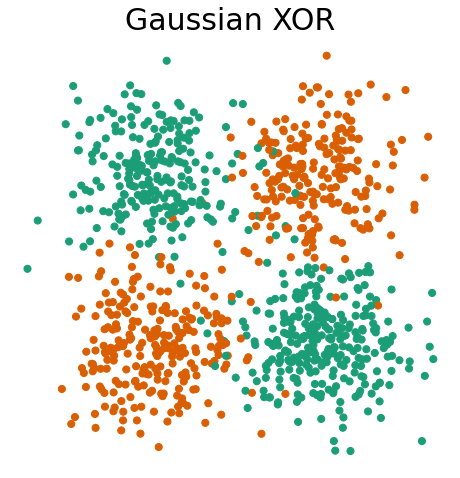

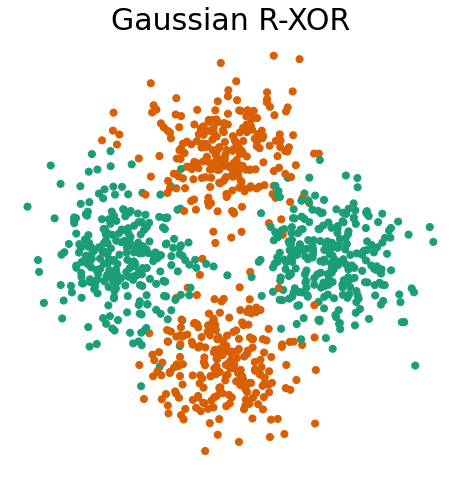

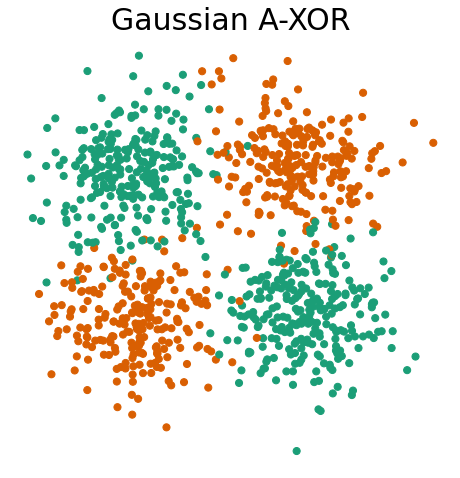

In [2]:
# call function to return gaussian xor and r-xor data:
X_xor, y_xor = generate_gaussian_parity(1000)
X_rxor, y_rxor = generate_gaussian_parity(1000, angle_params=np.pi/4)
# call function to adapt r-xor to xor:
X_axor, y_axor = fn.cpd_reg(X_rxor.copy(), X_xor.copy(), max_iter=50), y_rxor.copy()

# plot and format:
fn.plot_xor_rxor(X_xor, y_xor, 'Gaussian XOR')
fn.plot_xor_rxor(X_rxor, y_rxor, 'Gaussian R-XOR')
fn.plot_xor_rxor(X_axor, y_axor, 'Gaussian A-XOR')

## Experiment

In [3]:
angle_sweep = range(0,91,10)
task1_sample = 100
task2_sample = 100
mc_rep = 500

Run classifier with adaption off

In [4]:
mean_te1 = fn.bte_v_angle(angle_sweep, task1_sample, task2_sample, mc_rep, adaptation=False)

Run classifier with adaption on

In [5]:
mean_te2 = fn.bte_v_angle(angle_sweep, task1_sample, task2_sample, mc_rep, adaptation=True)

## Visualize Results

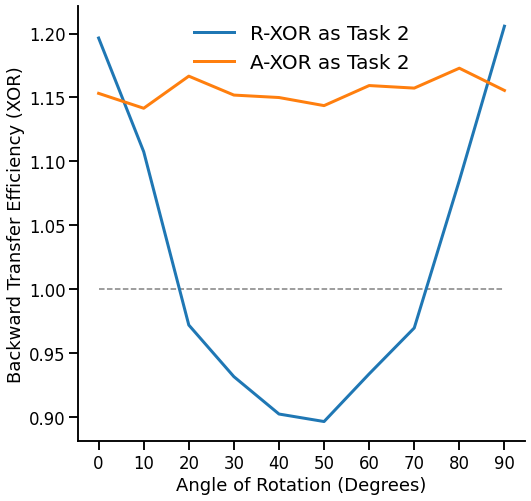

In [6]:
fn.plot_bte_v_angle(angle_sweep, mean_te1, mean_te2)